In [7]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [8]:
def load_dataset():
    data = pd.read_csv('textblob_dataset.csv')
    return data

In [9]:
tweet_df = load_dataset()
df = pd.DataFrame(tweet_df)

In [10]:
df

,Unnamed: 0,timestamp,tweet,sentiment
0,0,2022-05-15 06:12:25+00:00,i-i haven t had the booster vaccine yet,Negative
1,1,2022-05-19 09:35:16+00:00,aa already has the booster vaccine you can t s...,Negative
2,2,2022-05-19 10:00:50+00:00,amen allahumma amen for the prayers for the fa...,Positive
3,3,2022-03-03 06:31:44+00:00,amen tomorrow is a booster vaccine even though,Negative
4,4,2022-03-03 09:22:40+00:00,amen go home take a break immediately sis when...,Negative
...,...,...,...,...
4055,4055,2022-05-14 09:51:38+00:00,let s get vaccine booster ampoule url,Negative
4056,4056,2022-03-03 03:00:35+00:00,let s vaccine booster url,Negative
4057,4057,2021-11-25 06:57:09+00:00,yes yes yes yes kookmin jikook short au people...,Positive
4058,4058,2022-03-03 06:57:02+00:00,yes you are free to choose any booster vaccine...,Positive


In [11]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)
df

,tweet,sentiment
0,i-i haven t had the booster vaccine yet,Negative
1,aa already has the booster vaccine you can t s...,Negative
2,amen allahumma amen for the prayers for the fa...,Positive
3,amen tomorrow is a booster vaccine even though,Negative
4,amen go home take a break immediately sis when...,Negative
...,...,...
4055,let s get vaccine booster ampoule url,Negative
4056,let s vaccine booster url,Negative
4057,yes yes yes yes kookmin jikook short au people...,Positive
4058,yes you are free to choose any booster vaccine...,Positive


In [12]:
def label(x):
    if ( x == 'Positive'):
        return 1
    else:
        return 0
df.sentiment = df.sentiment.apply(label)

In [13]:
df

,tweet,sentiment
0,i-i haven t had the booster vaccine yet,0
1,aa already has the booster vaccine you can t s...,0
2,amen allahumma amen for the prayers for the fa...,1
3,amen tomorrow is a booster vaccine even though,0
4,amen go home take a break immediately sis when...,0
...,...,...
4055,let s get vaccine booster ampoule url,0
4056,let s vaccine booster url,0
4057,yes yes yes yes kookmin jikook short au people...,1
4058,yes you are free to choose any booster vaccine...,1


In [14]:
print(df.shape)
print(df['sentiment'].value_counts(normalize=True))

(4060, 2)
0    0.639409
1    0.360591
Name: sentiment, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df['tweet']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

X = tfidf.transform(X)

print(x_train.shape)
print(x_test.shape)
print(X.shape)

(3654, 6367)
(406, 6367)
(4060, 6367)


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='linear', probability=True)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))
print('prediksi hasil data testing :', svm.score(x_test, y_test))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print(scores)
print(mean(scores), std(scores))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       275
           1       0.92      0.74      0.82       131

    accuracy                           0.89       406
   macro avg       0.90      0.85      0.87       406
weighted avg       0.90      0.89      0.89       406

prediksi hasil data testing : 0.8940886699507389
Accuracy : 0.8940886699507389
[0.84236453 0.84236453 0.86699507 0.87931034 0.83990148 0.83990148
 0.84729064 0.84482759 0.85960591 0.83990148]
0.850246305418719 0.013023944893007176


[[266   9]
 [ 34  97]]


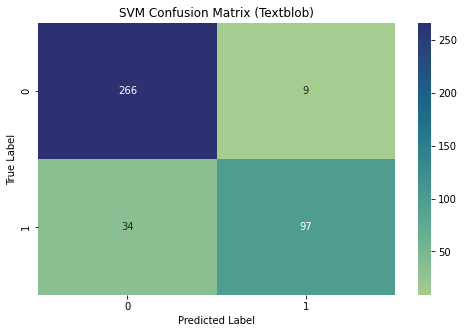

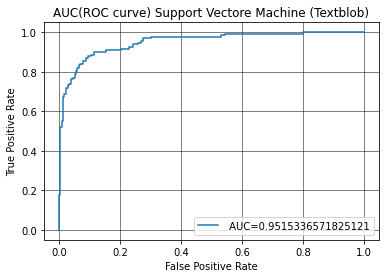

In [20]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt=".0f", ax=ax,cmap='crest')

plt.title('SVM Confusion Matrix (Textblob)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusionmatrix-svm-textblob.jpg', dpi=100)
plt.show()


from sklearn.metrics import roc_curve

y_pred = svm.predict_proba(x_test)[::,1]
test_fpr, test_tpr, _ = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) Support Vectore Machine (Textblob)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.savefig('roc-svm-textblob.jpg', dpi=100)
plt.show()

[[264  11]
 [ 46  85]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       275
           1       0.89      0.65      0.75       131

    accuracy                           0.86       406
   macro avg       0.87      0.80      0.83       406
weighted avg       0.86      0.86      0.85       406

prediksi hasil data testing : 0.8596059113300493
[0.80295567 0.82019704 0.83497537 0.8546798  0.80049261 0.81527094
 0.83497537 0.83497537 0.83497537 0.81527094]
0.8248768472906404 0.016055259593824908


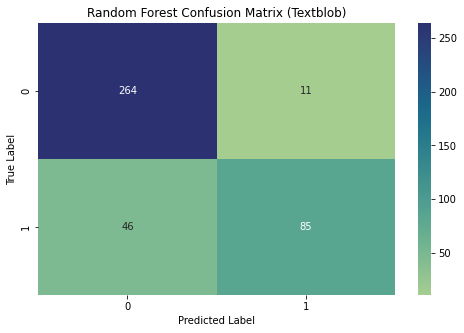

In [23]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

#BATAS 
matrix_rf = confusion_matrix(y_test, pred_rf)
print(matrix_rf)

print(classification_report(y_test, pred_rf))
print('prediksi hasil data testing :', rf.score(x_test, y_test))

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score

# kfold cross validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print(scores)
print(mean(scores), std(scores))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix_rf, annot=True, fmt=".0f", ax=ax,cmap='crest')

plt.title('Random Forest Confusion Matrix (Textblob)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusionmatrixrf-textblob.jpg', dpi=100)
plt.show()

# ROC CURVE


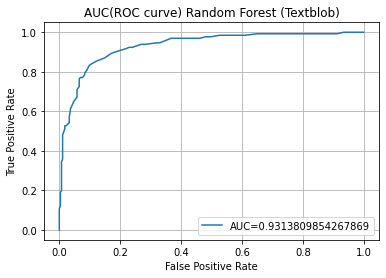

In [22]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.grid()

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("AUC(ROC curve) Random Forest (Textblob)")
plt.legend(loc=4)
plt.savefig("roc-rf-textblob.jpg", dpi=100)
plt.show()